# Complete dataset (active + bankrupt) estimators

Librerie varie da installare

In [27]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

Inclusione delle librerie utilizzate

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Variabili di gestione files

In [29]:
# Path of the files, can be changed
PATH_ACTIVE_DATASET = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_filtrato\indexes_active.pkl"

PATH_BANKRUPT_DATASET = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_filtrato\indexes_bankruptcy.pkl"

# True = export summary file in the OUTPUT_PATH
to_export = False

# Path of the desired output file, can be changed
OUTPUT_PATH = r"C:\Users\Andre\OneDrive - Università degli Studi di Parma\Tirocinio\Dataset_filtrato"

Leggo il dataset composto dai 2 file pickle

In [30]:
active_dataset = pd.read_pickle(PATH_ACTIVE_DATASET)
bankrupt_dataset = pd.read_pickle(PATH_BANKRUPT_DATASET)

Unisco i 2 dataset

In [31]:
complete_dataset = pd.concat([active_dataset, bankrupt_dataset])

Analizzo il dataset completo

In [32]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
complete_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of employees,823556.0000,18.2357,141.4019,0.0000,1.0000,4.0000,11.0000,32737.0000
TOTAL FIXED ASSETS,823556.0000,2116078.1751,36644627.9148,-2072496.0000,23850.0000,121198.5000,601000.0000,12144733000.0000
TOTAL CURRENT ASSETS,823556.0000,3593326.6681,30153430.9362,50.0000,222546.5000,636232.5000,1940553.7500,7794057000.0000
TOTAL INVENTORIES,823556.0000,1287069.9319,15938813.4979,-2746781.0000,24141.0000,138769.5000,612191.0000,6818341000.0000
Trade accounts,823556.0000,1132251.2821,6756225.8590,-2134852.0000,13397.0000,135622.5000,598164.5000,1126717000.0000
Trade accounts - beyond 12 months,823556.0000,20422.7938,915614.1435,-1460004.0000,0.0000,0.0000,0.0000,419364860.0000
TOTAL LIQUID FUNDS,823556.0000,342325.2702,4215409.3149,-2490740.0000,5632.0000,26095.0000,108183.2500,1178943000.0000
Total asset,823556.0000,5768682.4763,61794646.8248,61.0000,334278.0000,922501.0000,2844459.0000,19939100000.0000
TOTAL SHAREHOLDERS FUNDS,823556.0000,1660961.5100,26059260.4524,-400612049.0000,23245.0000,93951.5000,428803.5000,6162799000.0000
Other provisions,823556.0000,76956.4469,3103600.3133,-860918.0000,0.0000,0.0000,0.0000,1183545000.0000


In [33]:
indexes_dataset = complete_dataset.iloc[: , 41:].copy()
indexes_corr = indexes_dataset.corr()

<AxesSubplot:>

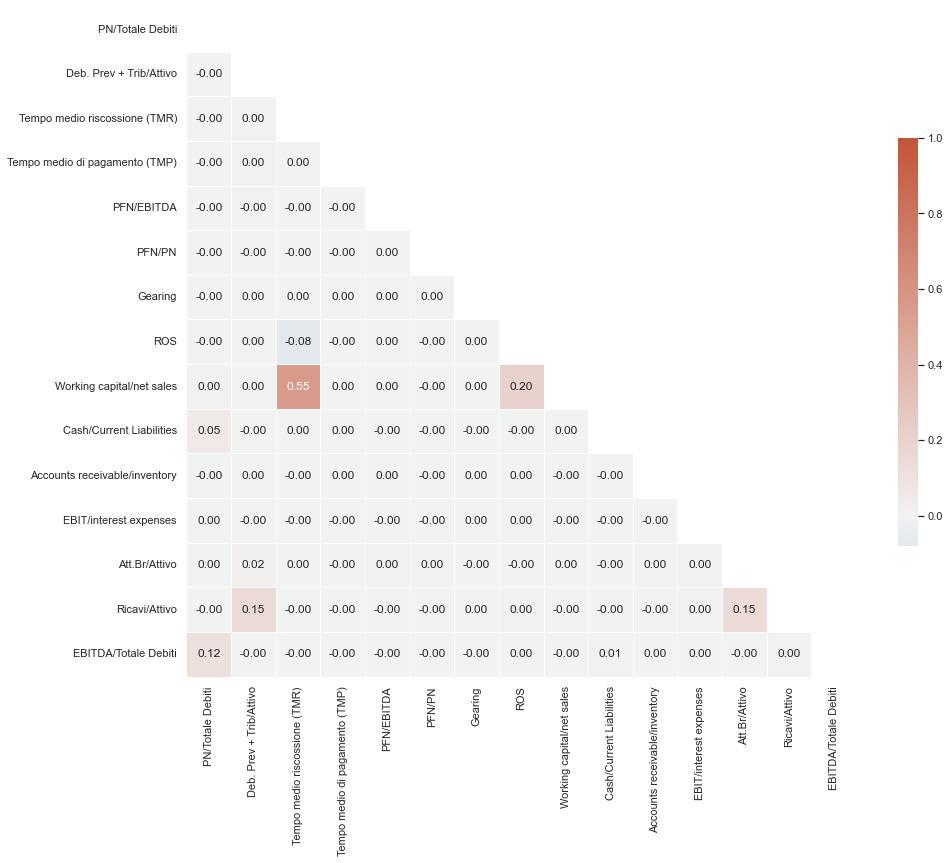

In [34]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(indexes_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(indexes_corr, mask=mask, cmap=cmap, vmax=1,
            center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

array([[<AxesSubplot:title={'center':'PN/Totale Debiti'}>,
        <AxesSubplot:title={'center':'Deb. Prev + Trib/Attivo'}>,
        <AxesSubplot:title={'center':'Tempo medio riscossione (TMR)'}>,
        <AxesSubplot:title={'center':'Tempo medio di pagamento (TMP)'}>],
       [<AxesSubplot:title={'center':'PFN/EBITDA'}>,
        <AxesSubplot:title={'center':'PFN/PN'}>,
        <AxesSubplot:title={'center':'Gearing'}>,
        <AxesSubplot:title={'center':'ROS'}>],
       [<AxesSubplot:title={'center':'Working capital/net sales'}>,
        <AxesSubplot:title={'center':'Cash/Current Liabilities'}>,
        <AxesSubplot:title={'center':'Accounts receivable/inventory'}>,
        <AxesSubplot:title={'center':'EBIT/interest expenses'}>],
       [<AxesSubplot:title={'center':'Att.Br/Attivo'}>,
        <AxesSubplot:title={'center':'Ricavi/Attivo'}>,
        <AxesSubplot:title={'center':'EBITDA/Totale Debiti'}>,
        <AxesSubplot:>]], dtype=object)

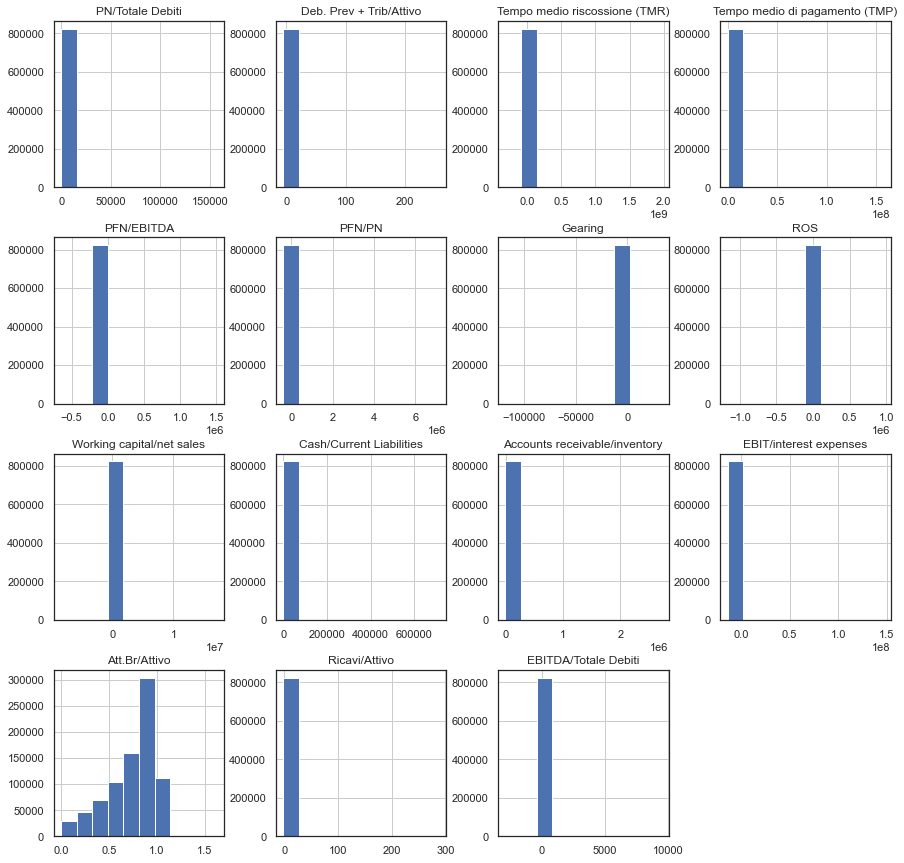

In [35]:
indexes_dataset.hist(figsize=(15, 15))

Esporto il dataset completo

In [36]:
str_cols = ['Ragione sociale',
            'Province',
            'Legal Form',
            'Legal Status',
            'Accounting closing date']
export_dataset = indexes_dataset.copy()
export_dataset[str_cols] = complete_dataset[str_cols]

In [37]:
# Reorder columns
export_dataset = export_dataset[['Ragione sociale',
                                 'Province',
                                 'Accounting closing date',
                                 'Legal Form',
                                 'Legal Status',
                                 'PN/Totale Debiti',
                                 'Deb. Prev + Trib/Attivo',
                                 'Tempo medio riscossione (TMR)',
                                 'Tempo medio di pagamento (TMP)',
                                 'PFN/EBITDA',
                                 'PFN/PN',
                                 'Gearing',
                                 'ROS',
                                 'Working capital/net sales',
                                 'Cash/Current Liabilities',
                                 'Accounts receivable/inventory',
                                 'EBIT/interest expenses',
                                 'Att.Br/Attivo',
                                 'Ricavi/Attivo',
                                 'EBITDA/Totale Debiti']]

In [38]:
export_dataset

,Ragione sociale,Province,Accounting closing date,Legal Form,Legal Status,PN/Totale Debiti,Deb. Prev + Trib/Attivo,Tempo medio riscossione (TMR),Tempo medio di pagamento (TMP),PFN/EBITDA,PFN/PN,Gearing,ROS,Working capital/net sales,Cash/Current Liabilities,Accounts receivable/inventory,EBIT/interest expenses,Att.Br/Attivo,Ricavi/Attivo,EBITDA/Totale Debiti
1,BOX & CO. S.R.L.,Siena,31/12/2017,Limited liability company - SRL,Active,0.0628,0.0185,132.3950,75.5950,4.9341,10.2645,0.9112,0.0832,0.7759,0.0904,1.1285,3.5954,0.8946,1.1530,0.1306
2,BOX 2000 - S.R.L.,Bologna,31/12/2018,Limited liability company - SRL,Active,0.0049,0.0000,5.7309,2083.2707,-179.9345,174.0113,0.9943,-0.3777,79.8321,0.0097,0.0002,-5053.0000,0.9975,0.0125,-0.0047
6,BOX AUTO S.R.L. DI EMANUELE CASTELLETTI,Verona,31/12/2017,Limited liability company - SRL,Active,0.2101,0.0123,59.3579,80.1097,9.8369,3.5334,0.7794,0.0712,0.3225,0.0049,2.4188,1.1848,0.2123,0.6581,0.0755
9,BOX DOCCE 2B S.P.A.,Modena,31/12/2017,Joint stock company - SPA,Active,0.0668,0.0327,147.7272,124.6759,-9.5667,7.8660,0.8872,-0.0943,0.6789,0.0001,1.7166,-18.5497,0.8468,1.2474,-0.0549
14,BOX LUZIO 38 SOCIETA' SEMPLICE DI GIORGIO DELL...,Roma,31/12/2016,Partnership - SS,Active,0.0897,0.0004,0.0000,37.4858,-5.9023,10.7101,0.9146,-0.1258,0.8233,0.1266,0.0000,-5.0556,0.9913,1.2041,-0.1627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12951,ZUIANI A.G. S.R.L.,Udine,40908,One-person company with limited liability - SRL,Bankruptcy,0.1996,0.0104,172.1550,197.8109,5.9302,2.3279,0.6995,0.0587,1.0504,0.0104,1.3394,1.1226,0.9622,0.9161,0.0783
12954,ZUMBO CALCESTRUZZI S.R.L. IN LIQUIDAZIONE,Catania,41274,Limited liability company - SRL,Bankruptcy,0.0110,0.0603,401.3823,551.9323,-22.6898,25.5876,0.9624,-0.0892,1.2899,0.0120,8.4242,-36.7717,0.8145,0.6314,-0.0124
12955,ZURIGO IMMOBILIARE S.R.L.,Milano,37256,Limited liability company - SRL,Bankruptcy,0.0999,0.0000,0.0000,0.0000,-0.0879,-0.0263,-0.0271,6.8979,252.6066,0.0026,0.0000,0.5129,0.9409,0.0037,0.0300
12956,ZUSICAFF SRL,Cosenza,42004,Limited liability company - SRL,Bankruptcy,0.4232,0.1157,96.2282,77.0817,3.2285,0.7210,0.4189,0.0591,0.5997,0.0079,2.2260,1.3800,0.2849,0.4750,0.0945


Esporto in csv e pickle

In [39]:
if to_export:
    export_dataset.to_csv(OUTPUT_PATH + "/indexes_complete.csv")
    export_dataset.to_pickle(OUTPUT_PATH + "/indexes_complete.pkl")

Cerco outliers

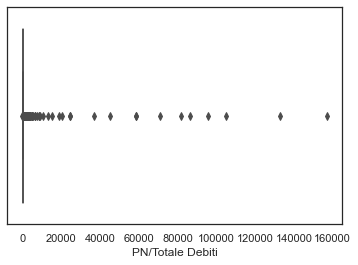

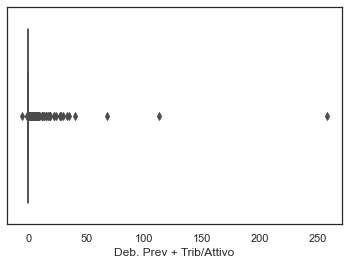

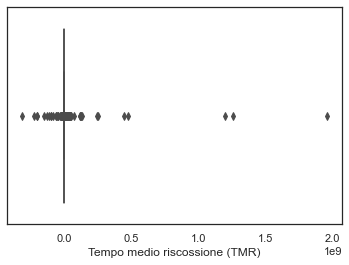

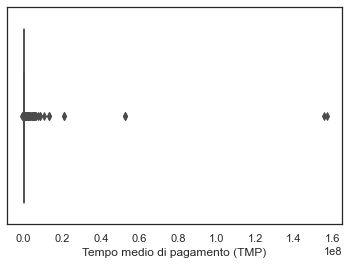

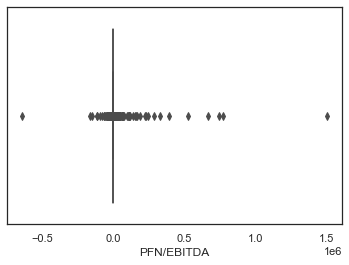

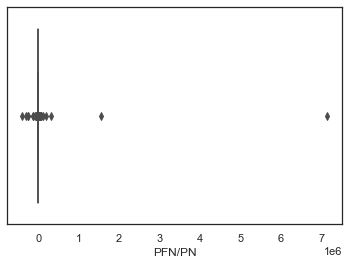

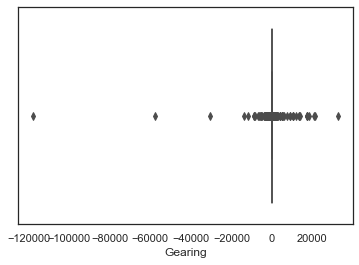

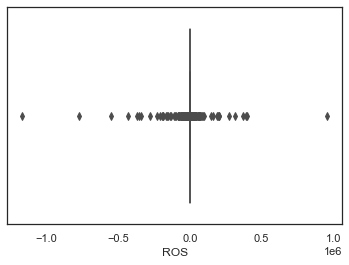

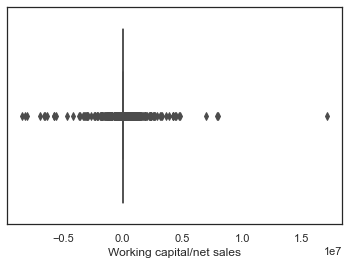

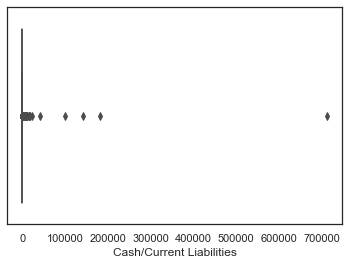

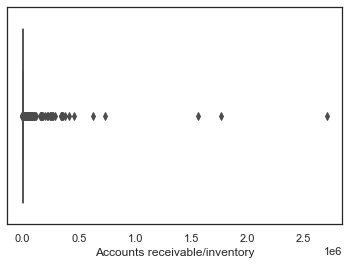

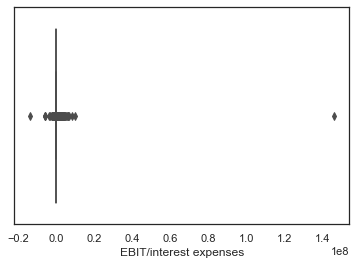

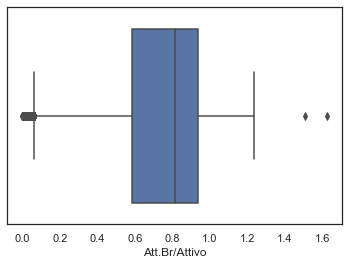

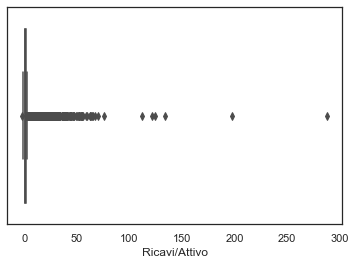

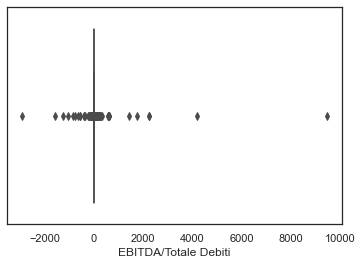

In [40]:
indexes_cols = [ 'PN/Totale Debiti',
                 'Deb. Prev + Trib/Attivo',
                 'Tempo medio riscossione (TMR)',
                 'Tempo medio di pagamento (TMP)',
                 'PFN/EBITDA',
                 'PFN/PN',
                 'Gearing',
                 'ROS',
                 'Working capital/net sales',
                 'Cash/Current Liabilities',
                 'Accounts receivable/inventory',
                 'EBIT/interest expenses',
                 'Att.Br/Attivo',
                 'Ricavi/Attivo',
                 'EBITDA/Totale Debiti']
for index_col in indexes_cols:
    plt.figure()
    sns.boxplot(x=export_dataset[index_col])

Rimuovo outliers

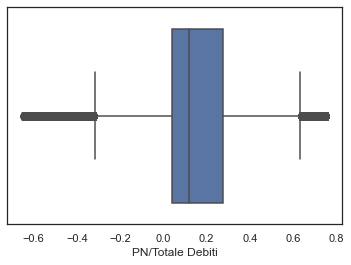

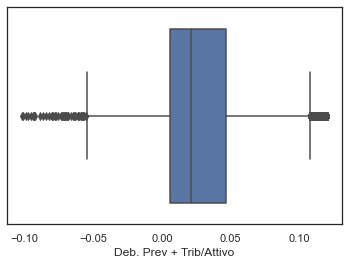

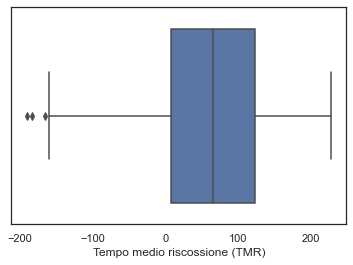

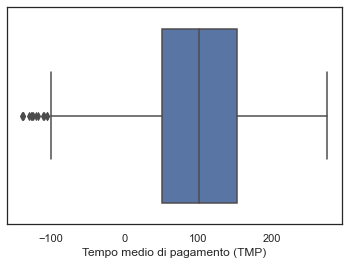

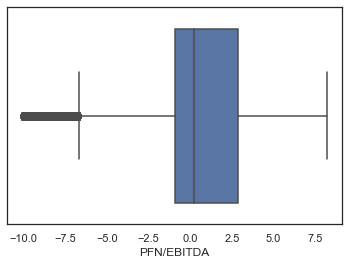

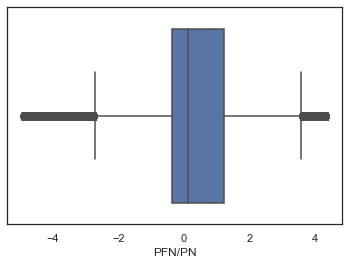

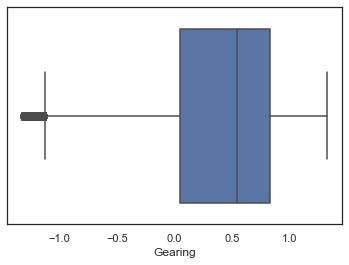

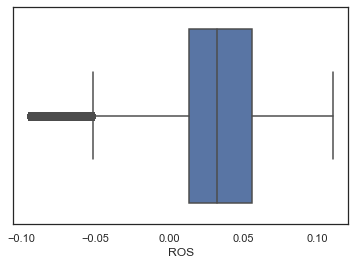

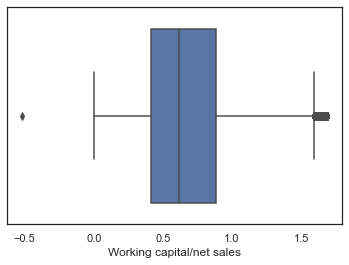

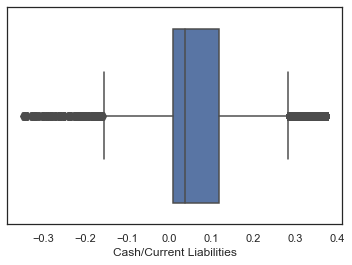

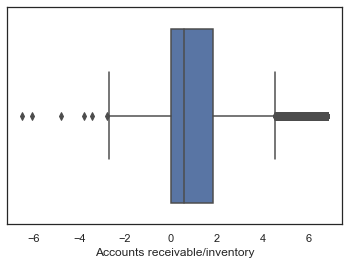

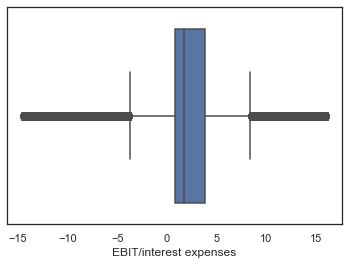

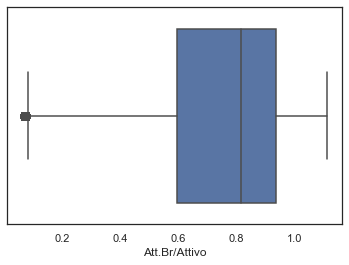

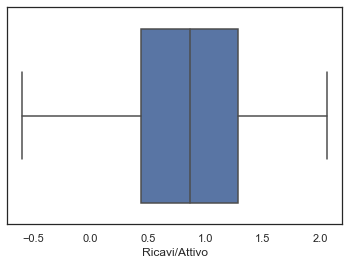

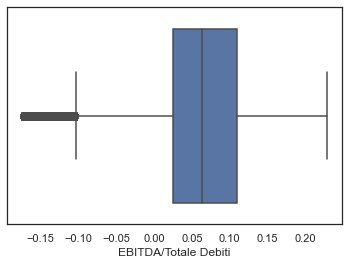

In [41]:
filtered_export_dataset = pd.DataFrame()
for index_col in indexes_cols:
    Q1 = export_dataset[index_col].quantile(0.25)
    Q3 = export_dataset[index_col].quantile(0.75)
    IQR = Q3 - Q1
    MIN = max(export_dataset[index_col].min(), Q1 - 1.5 * IQR)
    MAX = min(export_dataset[index_col].max(), Q1 + 1.5 * IQR)

    filtered_export_dataset = export_dataset[(export_dataset[index_col] >= MIN) & (export_dataset[index_col] <= MAX)]
    plt.figure()
    sns.boxplot(x=filtered_export_dataset[index_col])

Analizzo il dataset con outlier rimossi

In [42]:
filtered_export_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PN/Totale Debiti,646468.0000,0.3458,2.2523,-112.6033,0.0432,0.1252,0.3196,850.3954
Deb. Prev + Trib/Attivo,646468.0000,0.0764,0.1807,-0.9418,0.0075,0.0273,0.0812,40.6700
Tempo medio riscossione (TMR),646468.0000,8685.0070,3451717.3915,-224550000.0000,17.2189,90.3022,167.6345,1954918080.0000
Tempo medio di pagamento (TMP),646468.0000,1272.0715,223219.7578,-596772.6923,70.4960,130.1121,221.9532,156964680.0000
PFN/EBITDA,646468.0000,15.3112,2935.9659,-641498.5000,-0.6769,2.1663,6.7456,1503519.0000
PFN/PN,646468.0000,15.6250,8917.6615,-388440.0000,-0.1292,0.9411,3.8786,7132785.0000
Gearing,646468.0000,0.6576,117.1445,-57762.0000,0.2247,0.6695,0.9050,32374.8571
ROS,646468.0000,-5.7422,2291.5514,-1169550.0000,0.0068,0.0296,0.0598,397080.5000
Working capital/net sales,646468.0000,83.4363,48864.2707,-8386663.0000,0.4937,0.7704,1.4112,17091276.0000
Cash/Current Liabilities,646468.0000,1.6397,887.3375,-140.3598,0.0089,0.0447,0.1643,712466.6667


<AxesSubplot:>

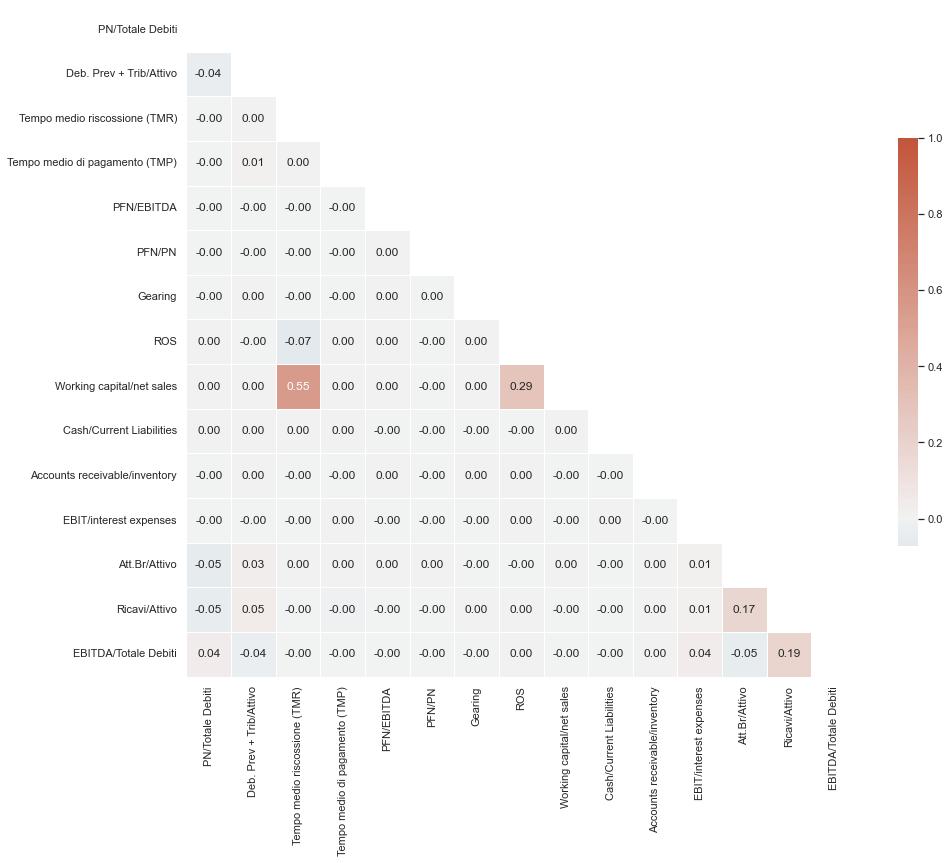

In [43]:
indexes_corr = filtered_export_dataset.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(indexes_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(indexes_corr, mask=mask, cmap=cmap, vmax=1,
            center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Esporto in csv e pickle

In [44]:
if to_export:
    filtered_export_dataset.to_csv(OUTPUT_PATH + "/filtered_indexes_complete.csv")
    filtered_export_dataset.to_pickle(OUTPUT_PATH + "/filtered_indexes_complete.pkl")